# Biological, Health, and Socioeconomic Factors Causing Diabetes

### Video Presentation: https://youtu.be/GE2OIT554UQ

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ `X` ] YES - make available
* [  ] NO - keep private

# Overview

The purpose of this project is to explore which factors is most indictive of diabetes and whether or not economic factors plays a part into this. We used a multitude of plots to demonstrate the relation of different factors on diabetes, and we used OLS to demonstrate the relation of income to other factors. In the end, our hypothesis was correct that BMI, high cholesterol, smoking history, and lower income were the most indictive of diabetes, but we also found that it is possible that age was a confounding factor in our analysis of the effect of income.

# Names

- Aiden Jee
- Rishmal Rohin Kumar
- Gavin Zhou

<a id='research_question'></a>
# Research Question

What biological, health, and socioeconomic factors are most indicative of diabetes or prediabetes? Do the most indicative factors vary based on Income?

<a id='background'></a>

## Background & Prior Work

Diabetes is a chronic health disease that affects how your body turns food into energy. Diabetes affects many Americans today, and it is the eighth leading cause of death in America. (1) There are three main types of diabetes: type 1, type 2, and gestational diabetes. With diabetes, the body doesn’t make enough insulin or can’t use it as well as it should. This can lead to serious problems such as heart disease, vision loss, and kidney disease. Diabetes is incurable, but there are many factors that are within human control. (2) That leads us to our question: What are the significant relationships between biological and health factors, such as age, BMI, blood glucose level, etc., and diabetes?

There is an abundance of research on the topic, but many prior works are focused on the connection of sociodemographic factors and diabetes. This can be helpful to our research, as many sociodemographic factors are directly correlated to health and biological factors. In fact, one work finds extremely high correlation between low socioeconomic status and diabetes. Low socioeconomic status is also found to be directly related to high body weight and lack of exercise, which supports the idea that obesity is a big factor in diabetes. (3) 

Other works find many lifestyle factors to be a strong force behind the cause of diabetes. Most notably are lack of exercise, weight, and poor sleep. (4) Our research aims to find other factors that may be helpful in the prevention of diabetes or even the treatment of it. 

References: 
1. https://www.mayoclinic.org/diseases-conditions/diabetes/symptoms-causes/syc-20371444
2. https://www.cdc.gov/diabetes/basics/diabetes.html 
3. https://bmcendocrdisord.biomedcentral.com/articles/10.1186/s12902-019-0463-3 
4. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4166864/


# Hypothesis


We hypothesize that BMI, High Cholesterol and Smoking history will be the most indicative of diabetes or prediabetes. We also hypothesize that people with lower income will have higher rates of diabetes or prediabetes.

# Dataset(s)

**Dataset Name:** Diabetes Health Indicators Dataset

**Link to the Dataset:** https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download&select=diabetes_binary_health_indicators_BRFSS2015.csv

**Number of Observations:** 253,680 observations


**Description of Dataset:** This dataset is from the Behavioral Risk Factor Surveillance System (BRFSS), which is a health-related telephone survey in the United States that is collected annually by the CDC. The survey asks Americans about health-related risk behaviors and chronic health conditions. This dataset is from the 2015 survey.

| **Attribute** | **Description** |
| --- | --- |
| Diabetes | Does participant have Diabetes? Boolean Value: 0 = No, 1 = Yes |
| High Blood Pressure | Does participant have High Blood Pressure? Boolean Value: 0 = No, 1 = Yes |
| High Cholestrol | Does participant have High Cholesterol? Boolean Value: 0 = No, 1 = Yes |
| Cholestrol Check | Has the participant had a Cholesterol Check in the past 5 years? Boolean Value: 0 = No, 1 = Yes |
| BMI | Body Mass Index of the participant. Integer Value |
| Smoking History | Has the participant Smoked at least 100 cigarettes in their entire life? Boolean Value: 0 = No, 1 = Yes |
| Physical Activity | Has the participant done Physical Activity in the past 30 days, not including their job? Boolean Value: 0 = No, 1 = Yes |
| Heavy Alcohol Consumption | Adult Men: At least 14 drinks per week, Adult Women: At least 7 drinks per week. Boolean Value: 0 = No, 1 = Yes |
| Sex | Participant's Sex. Boolean Value: 0 = Female, 1 = Male |
| Age | Participant's Age in AGE5YR (14-Level Age Category). Integer Value: 1 = 18-24, . . . , 9 = 60-64, . . . , 13 = 80 or older |
| Income | Particpant's Income in INCOME2 (8-Level Income Category). Integer Value: 1  = Less than $10,000, . . . , 8 = $75,000 or more |

# Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm

In [3]:
data = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")

# Data Cleaning

First, let's take a look at the dataset.

In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


We decided to focus on a specific subset of the available features for our study. We will remove the unnecessary columns from our dataframe

In [ ]:
data.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [41]:
data = data[['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'PhysActivity', 'HvyAlcoholConsump', 'Age', 'Income']]
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,HvyAlcoholConsump,Age,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,9.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,1.0,0.0,7.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,9.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,1.0,0.0,11.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,1.0,0.0,11.0,4.0


Since we are going to be considering many of these factors in conjuction with one another, we want to make sure to get rid of all rows that have any empty columns. Fortunately, we found that this dataset had no rows with empty columns.

In [ ]:
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
MentHlth                0
Sex                     0
Age                     0
Income                  0
dtype: int64

We noticed that a lot of the column names are unclear and confusing, so we decided to rename many of the columns

In [4]:
data = data.rename(columns = {"Diabetes_binary": "Diabetes", "HighBP": "High Blood Pressure", "HighChol" : "High Cholesterol", "CholCheck": "Cholesterol Check", "Smoker": "Smoking History", "HeartDiseaseorAttack": "Heart Disease or Attack", "PhysActivity": "Physical Activity", "HvyAlcoholConsump": "Heavy Alcohol Consumption", "MentHlth": "Mental Health"})
data.head()

,Diabetes,High Blood Pressure,High Cholesterol,Cholesterol Check,BMI,Smoking History,Stroke,Heart Disease or Attack,Physical Activity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,Mental Health,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


We replaced the values in the Boolean columns with the actual Boolean values

In [5]:
data["Diabetes"] = data["Diabetes"].replace((0.0, 1.0), (False, True))
data["High Blood Pressure"] = data["High Blood Pressure"].replace((0.0, 1.0), (False, True))
data["High Cholesterol"] = data["High Cholesterol"].replace((0.0, 1.0), (False, True))
data["Cholesterol Check"] = data["Cholesterol Check"].replace((0.0, 1.0), (False, True))
data["Smoking History"] = data["Smoking History"].replace((0.0, 1.0), (False, True))
data["Physical Activity"] = data["Physical Activity"].replace((0.0, 1.0), (False, True))
data["Heavy Alcohol Consumption"] = data["Heavy Alcohol Consumption"].replace((0.0, 1.0), (False, True))
data["Heavy Alcohol Consumption"] = data["Heavy Alcohol Consumption"].replace((0.0, 1.0), (False, True))
data["Sex"] = data["Sex"].replace((0.0, 1.0), ("Female", "Male"))

Lastly, let's take a look at all the values and there counts for each of the columns of the dataframe in order to check if there is anything out of the ordinary that might signify an issue

In [ ]:
data['Diabetes'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes, dtype: int64

In [ ]:
data['High Blood Pressure'].value_counts()

0.0    144851
1.0    108829
Name: High Blood Pressure, dtype: int64

In [ ]:
data['High Cholesterol'].value_counts()

0.0    146089
1.0    107591
Name: High Cholesterol, dtype: int64

In [ ]:
data['Cholesterol Check'].value_counts()

1.0    244210
0.0      9470
Name: Cholesterol Check, dtype: int64

In [ ]:
data['BMI'].value_counts()

27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

In [ ]:
data['Smoking History'].value_counts()

0.0    141257
1.0    112423
Name: Smoking History, dtype: int64

In [ ]:
data['Physical Activity'].value_counts()

1.0    191920
0.0     61760
Name: Physical Activity, dtype: int64

In [ ]:
data['Heavy Alcohol Consumption'].value_counts()

0.0    239424
1.0     14256
Name: Heavy Alcohol Consumption, dtype: int64

In [ ]:
data['Sex'].value_counts()

0.0    141974
1.0    111706
Name: Sex, dtype: int64

In [ ]:
data['Age'].value_counts()

9.0     33244
10.0    32194
8.0     30832
7.0     26314
11.0    23533
6.0     19819
13.0    17363
5.0     16157
12.0    15980
4.0     13823
3.0     11123
2.0      7598
1.0      5700
Name: Age, dtype: int64

In [ ]:
data['Income'].value_counts()

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64

# Data Analysis & Results

After all of our cleaning, let's take a look at the dataset.

In [ ]:
data.describe()

,Diabetes,High Blood Pressure,High Cholesterol,Cholesterol Check,BMI,Smoking History,Stroke,Heart Disease or Attack,Physical Activity,Heavy Alcohol Consumption,Mental Health,Sex,Age,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.056197,3.184772,0.440342,8.032119,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.230302,7.412847,0.496429,3.054220,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,10.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,13.000000,8.000000


In order to judge the relationship between BMI and diabetes, we first plotted the distribution of all the BMIs to see the overall data.

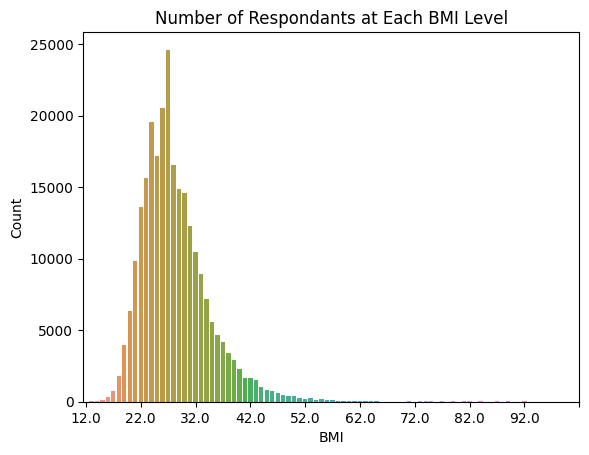

In [8]:
sns.countplot(x = "BMI", data = data)
plt.title('Number of Respondants at Each BMI Level')
plt.ylabel('Count')
plt.xticks(np.arange(0, 100, 10))
plt.show()

Now, we can look at the BMIs of the dataset based on if the person has diabetes or prediabetes, and we can see that there is a significant increase in BMI for people with diabetes or prediabetes. This supports our hypothesis that BMI is one of the most significant factors causing diabetes.

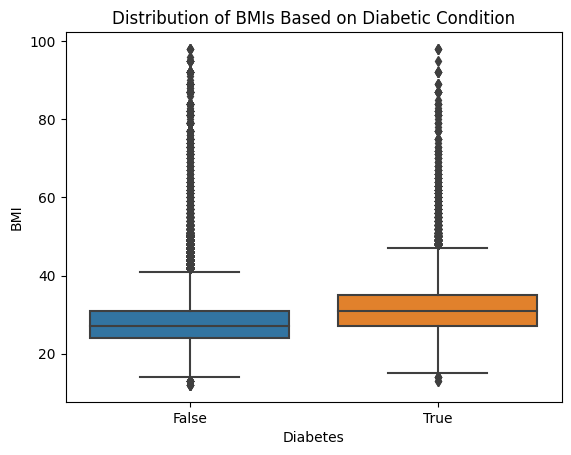

In [9]:
sns.boxplot(x = "Diabetes", y = "BMI", data = data).set(title='Distribution of BMIs Based on Diabetic Condition')
plt.show()

The next part of our hypothesis was that High Blood Pressure was another important indicator of diabetes or prediabetes. We decided to plot the number of people with diabetes who have High Blood Pressure, High Cholesterol, Both and Neither to help with our analysis.

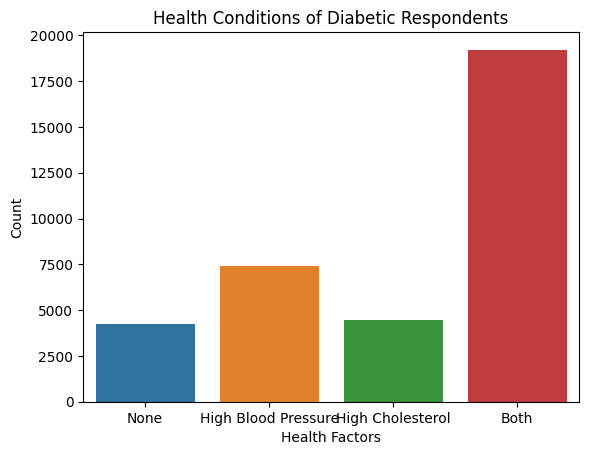

In [22]:
bp_chol = data[data["Diabetes"] == True]
bp_chol = bp_chol[["High Blood Pressure", "High Cholesterol"]]

bp_chol["Label"] = "None"
bp_chol.loc[(bp_chol["High Blood Pressure"] == True) & (bp_chol["High Cholesterol"] == False), "Label"] = "High Blood Pressure"
bp_chol.loc[(bp_chol["High Blood Pressure"] == False) & (bp_chol["High Cholesterol"] == True), "Label"] = "High Cholesterol"
bp_chol.loc[(bp_chol["High Blood Pressure"] == True) & (bp_chol["High Cholesterol"] == True), "Label"] = "Both"

sns.countplot(x = "Label", data = bp_chol, order = ["None", "High Blood Pressure", "High Cholesterol", "Both"]).set(xlabel='Health Factors', ylabel='Count',title='Health Conditions of Diabetic Respondents')
plt.show()

As you can see from the above plot, most of the people who have diabetes or prediabetes have both High Blood Pressure and High Cholesterol, which makes a lot of sense. However, when comparing people who only have one or the other, there are more people with diabetes or prediabetes that have High Blood Pressure when compared to High Cholesterol.

To examine more of the variables in the dataset, we combined Smoking History, Physical Activity, and Heavy Alcohol Consumption as they all represented the respondents' overall lifestyle. First off, we simply plotted a barplot of the percentage of people who do and don't have diabetes or prediabetes in comparison to them being Healthy or Unhealthy. We labeled Healthy people as those who did not have a smoking history, did physical activity relatively regularly, and did not have heavy alcohol consumption. As we would expect, people labeled as Healthy were far less likely to have diabetes than those that were labeled as Unhealthy, but the gap was not as large as we expected.

C:\Users\rishm\AppData\Local\Temp\ipykernel_34864\3932322081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Label"] = "Unhealthy"


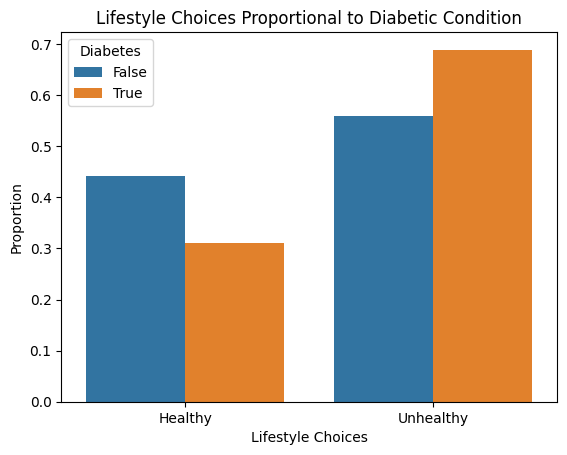

In [13]:
temp = data[["Diabetes", "Smoking History", "Physical Activity", "Heavy Alcohol Consumption"]]

temp["Label"] = "Unhealthy"
temp.loc[(temp["Smoking History"] == False) & (temp["Physical Activity"] == True) & (temp["Heavy Alcohol Consumption"] == False), "Label"] = "Healthy"

temp = temp.groupby("Diabetes")["Label"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Label", y = "Proportion", data = temp, hue = "Diabetes", order = ["Healthy", "Unhealthy"]).set(xlabel='Lifestyle Choices', title='Lifestyle Choices Proportional to Diabetic Condition')
plt.show()

Diving a bit deeper, we divided the Unhealthy respondents into groups based on how unhealthy they were. We created groups of 1/3, 2/3, and 3/3 of how many factors were unhealthy for them, from the group of Smoking History, Physical Activity, and Heavy Alcohol Consumption. We expected to see a steady increase in the percentage of people who had diabetes or prediabetes as we went from 0/3 to 3/3.

C:\Users\rishm\AppData\Local\Temp\ipykernel_34864\3406686360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifestyle["Label"] = "3 / 3"


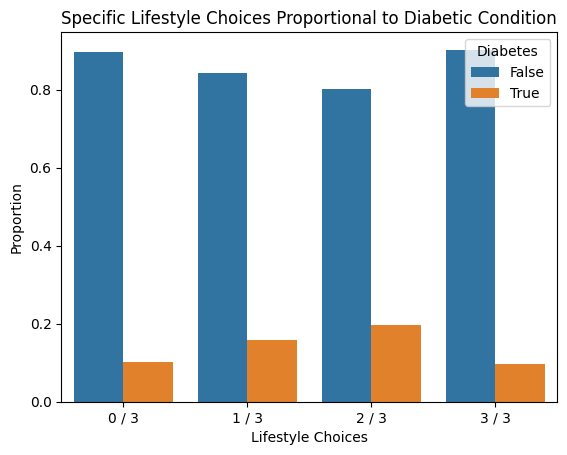

In [14]:
lifestyle = data[["Diabetes", "Smoking History", "Physical Activity", "Heavy Alcohol Consumption"]]

lifestyle["Label"] = "3 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == False) & (lifestyle["Physical Activity"] == True) & (lifestyle["Heavy Alcohol Consumption"] == False), "Label"] = "0 / 3"

lifestyle.loc[(lifestyle["Smoking History"] == True) & (lifestyle["Physical Activity"] == True) & (lifestyle["Heavy Alcohol Consumption"] == False), "Label"] = "1 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == False) & (lifestyle["Physical Activity"] == False) & (lifestyle["Heavy Alcohol Consumption"] == False), "Label"] = "1 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == False) & (lifestyle["Physical Activity"] == True) & (lifestyle["Heavy Alcohol Consumption"] == True), "Label"] = "1 / 3"

lifestyle.loc[(lifestyle["Smoking History"] == False) & (lifestyle["Physical Activity"] == False) & (lifestyle["Heavy Alcohol Consumption"] == True), "Label"] = "2 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == True) & (lifestyle["Physical Activity"] == True) & (lifestyle["Heavy Alcohol Consumption"] == True), "Label"] = "2 / 3"
lifestyle.loc[(lifestyle["Smoking History"] == True) & (lifestyle["Physical Activity"] == False) & (lifestyle["Heavy Alcohol Consumption"] == False), "Label"] = "2 / 3"

lifestyle = lifestyle.groupby("Label")["Diabetes"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Label", y = "Proportion", hue = "Diabetes", data = lifestyle).set(xlabel='Lifestyle Choices', title='Specific Lifestyle Choices Proportional to Diabetic Condition')
plt.show()

The results were not exactly what we expected as the percentage of people who had 3/3 unhealthy factors and had diabetes or prediabetes was actually less than the percentage of people with 0/3 and diabetes or prediabetes. We think part of this is due to the fact that there was not a large sample size of people with 3/3 unhealthy factors, but it was still rather surprising.

Finally, we plotted the percentage of people who had diabetes based on Smoking History, and the results showed that people who had a smoking history were more likely to have diabetes or prediabetes, which was not surprising. However, the difference was not as large as we expected, which is starting to become a theme.

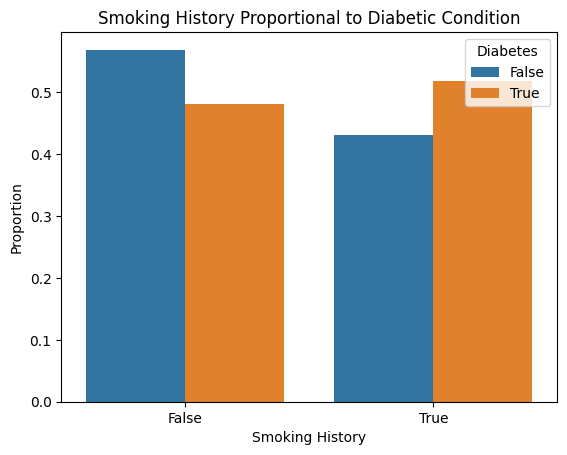

In [15]:
smoking_df = data.groupby("Diabetes")["Smoking History"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Smoking History", y = "Proportion", hue = "Diabetes", data = smoking_df).set(title='Smoking History Proportional to Diabetic Condition')
plt.show()

Finally, to address the last part of our hypothesis we plotted the percentage of respondents who had diabetes or prediabetes based on income. We hypothesized that people with lower income would have higher chances of having diabetes or prediabetes and people with higher income would have lower chances. The graph below shows that exact relationship that we predicted, but the gap was much larger than we expected for once, especially for income group 8, which consisted of nearly 40% of all respondents who did not have diabetes.

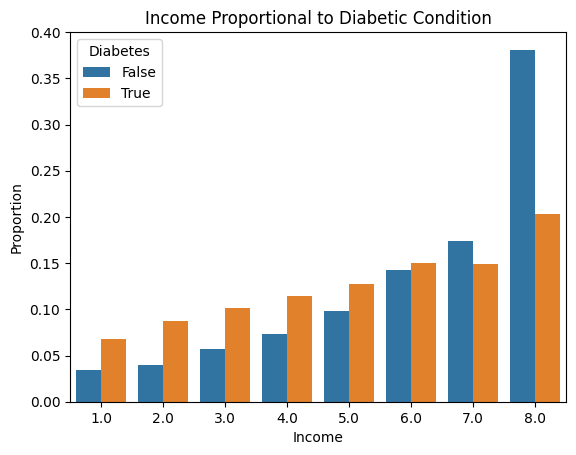

In [16]:
income_df = data.groupby("Diabetes")["Income"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Income", y = "Proportion", hue = "Diabetes", data = income_df).set(title='Income Proportional to Diabetic Condition')
plt.show()

We were interested to see if Age was possibly a confounding variable in this analysis because age has a significant impact on income, as we can see from the graph below.

C:\Users\rishm\AppData\Local\Temp\ipykernel_42544\2396857767.py:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 8, 1)


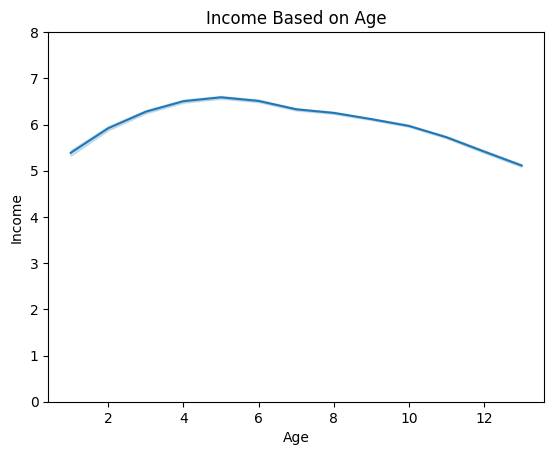

In [6]:
sns.lineplot(x = "Age", y = "Income", data = data).set(title='Income Based on Age')
plt.ylim(0, 8, 1)
plt.show()

In order to get a baseline understanding of how Age impacts chances of getting diabetes or prediabetes, we plotted the percentage of people with those diagnoses based on age, and we found that older people are much, much more likely to get diabetes or prediabetes than younger people, as we would expect.

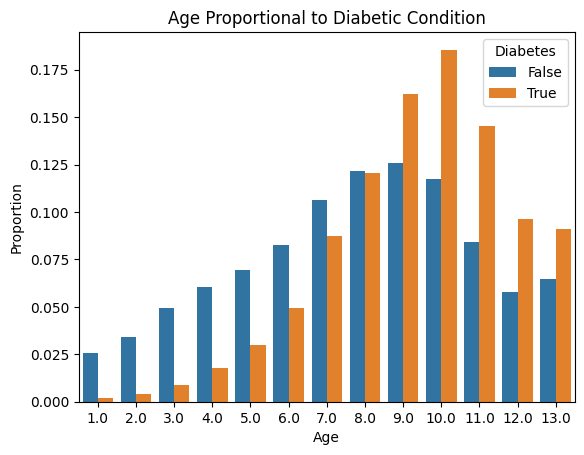

In [18]:
age_df = data.groupby("Diabetes")["Age"].value_counts(normalize = True).rename("Proportion").reset_index()

sns.barplot(x = "Age", y = "Proportion", hue = "Diabetes", data = age_df).set(title='Age Proportional to Diabetic Condition')
plt.show()

Based on this information, we wanted to try to determine if Age was a confounding variable in the Income plot we saw earlier. As such, we plotted the age distributions of people in income group 8, which is an income over $75,000 per year, and income group 2, which is $10,000 - $15,000, which were the two income groups with the largest differences in percentage of people with and without diabetes from the earlier graph.

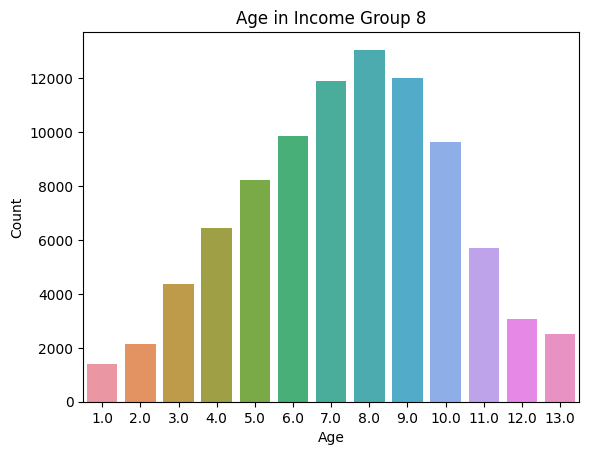

In [20]:
income8 = data[data["Income"] == 8]
sns.countplot(x = "Age", data = income8).set(ylabel='Count', title='Age in Income Group 8')
plt.show()

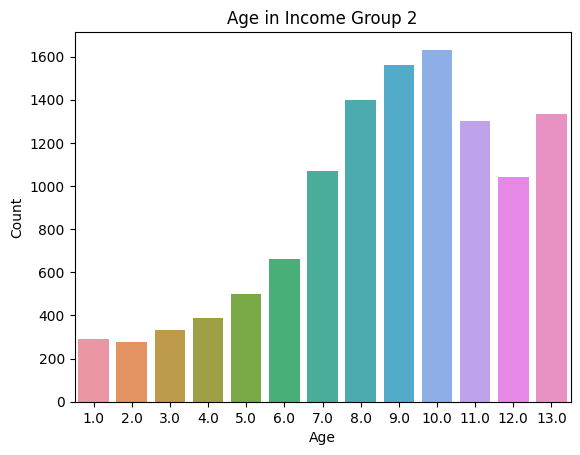

In [21]:
income2 = data[data["Income"] == 2]
sns.countplot(x = "Age", data = income2).set(ylabel='Count', title='Age in Income Group 2')
plt.show()

The results for income group 8 were fairly normally distributed, with a slight leaning towards the younger side. In stark contrast, the people in income group 2 were much older. Since we know that older people are much more likely to have diabetes or prediabetes, these graphs suggest that Age could be a confounding variable when we were considering Income.

In order to quantifiably prove that there is a relationship between Income and Age, we created a linear model between Age and Income and found that the slope is about -0.0866 and 0 is not included in the confidence interval, between 0.025 and 0.975, of the slope. This means that there is a relationship between Age and Income, which again suggests that Age could be a confounding variable when examining the relationship between Income and diabetes.

In [56]:
outcome, predictors = patsy.dmatrices("Income ~ Age", data = data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     4210.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:20:55   Log-Likelihood:            -5.4257e+05
No. Observations:              253680   AIC:                         1.085e+06
Df Residuals:                  253678   BIC:                         1.085e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7498      0.011    588.225      0.0

# Ethics & Privacy

We understand that there can be many biases in our research. For example, our datasets might be focused on just one country or just one race. This can create a bias in our project as limiting the research to a certain population of a country or race will only give information about these specific groups of people. We reduce bias by finding data that includes a large group of people that encompasses worldwide diabetes cases.

There’s also the case where data points could be focused on people that already have diabetes instead of a general population of people. To avoid this, we can choose data that encompasses a wider range of people to avoid a “survivor” bias. More specifically, there should be an even split between diabetic and non-diabetic people to have a better proportion of data

# Conclusion & Discussion

Diabetes is a huge problem for people all around the world, but especially in America, where it is the eighth leading cause of death in the country. We wanted to try to determine what biological, health, and socioeconomic factors were the most indicative of diabetes in this country. We found a dataset from Behavioral Risk Factor Surveillance System (BRFSS) which contained the responses to a health-related survey from 2015. From the many biological, health, and socioeconomic factors that were listed in this dataset, we thought BMI, High Blood Pressure, Smoking History, and Income would be the most indicative of diabetes or prediabetes.

Fortunately, the BRFSS dataset we were using did not require much data cleaning because there were no empty columns. The main parts of data cleaning that we did was that we renamed the columns and changed certain values in the columns to be more informative. Then, we moved on to performing Exploratory Data Analysis by creating many different plots of the different factors and their effects on diabetes and each other to determine if our hypothesis was correct. We plotted the overall distribution of BMI in the entire dataset and plotted the distributions separated by diabetic condition, and we found that there was a significant increase in BMI for respondents with diabetes or prediabetes, supporting that part of our hypothesis. Next, we plotted the number of people with diabetes based on whether they had High Blood Pressure, High Cholesterol, Both, or Neither. As expected, the number of people with diabetes and both High Blood Pressure and High Cholesterol was the highest, but the number of people with diabetes and just High Blood Pressure was higher than the number of people with diabetes and just High Cholesterol, supporting our hypothesis. We also examined the effect of lifestyle choices on diabetes, such as Smoking History, Physical Activity, and Heavy Alcohol Consumption. In general, having less healthy lifestyle choices made people more likely to have diabetes or prediabetes, but the proportion of people who were unhealthy in all three categories and still had diabetes was less than those who were just unhealthy in 2/3 categories. We did plot just Smoking History and its effect on diabetes and found a meaningful margin, but it was not as large as we expected. Lastly, we examined the effect of income on diabetes, and we found that people in lower income groups were much more likely to have diabetes than those in higher income groups, which is what we expected. We were interested in determining if Age was a confounding factor in our Income analysis so we plotted the age distributions of different age groups and the effect age had on income. We also created a linear model of income based on age and found that the slope was never 0 in the confidence interval, so we do think Age is a possible confounding factor in the effect of Income on diabetes.

Overall, we accept all parts of our hypothesis as BMI, High Blood Pressure, and Smoking History were among the most impactful features on diabetic condition that we examined, although the effect of Smoking History was not as large as we anticipated. Income also seemed to be correlated with respondents having diabetes or prediabetes, but we found that Age could be a confounding factor in that analysis, so we could not determine if Income or Age was more impactful on diabetic condition.

# Team Contributions

Aiden Jee: Hypothesis, Data Cleaning, Data Analysis, Team Contributions, Video Planning

Rishmal Rohin Kumar: Background & Prior Work, Setup, Data Analysis, Conclusion & Discussion, Video Presentation

Gavin Zhou: Overview, Dataset, Data Analysis, Ethics & Privacy, Video Presentation